# Lab Assignment 2 - Linear Regression - Part 1 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder # For one hot encoder
from sklearn.impute import SimpleImputer # Fro replacing Nan with mean values
from sklearn import preprocessing #For normalizing
from sklearn.model_selection import train_test_split # For training testing data
from sklearn.linear_model import LinearRegression # Fro linear regression model
import matplotlib.pyplot as plt  # For plotting
import seaborn as seabornInstance # for plotting
from sklearn import metrics #For evaluating the performance of algorithm ( Mean squared error )


### Reading Data

In [2]:
data = pd.read_csv("Car_sales.csv")
data.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


### Preprocessing

#### Removing redundant columns

In [3]:
data = data.drop(['Latest Launch','Wheelbase','Curb weight','Model'], axis=1)
data.head()

,Manufacturer,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Width,Length,Fuel capacity,Fuel efficiency
0,Acura,16.919,16.36,Passenger,21.5,1.8,140,67.3,172.4,13.2,28
1,Acura,39.384,19.875,Passenger,28.4,3.2,225,70.3,192.9,17.2,25
2,Acura,14.114,18.225,Passenger,.,3.2,225,70.6,192,17.2,26
3,Acura,8.588,29.725,Passenger,42,3.5,210,71.4,196.6,18,22
4,Audi,20.397,22.255,Passenger,23.99,1.8,150,68.2,178,16.4,27


#### One Hot Encoder

In [4]:
le = LabelEncoder() 
data['Vehicle type']= le.fit_transform(data['Vehicle type'])  # 1 - Passenger / 0 - Car
data['Manufacturer']= le.fit_transform(data['Manufacturer']) 
data.head(20)

,Manufacturer,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Width,Length,Fuel capacity,Fuel efficiency
0,0,16.919,16.36,1,21.5,1.8,140,67.3,172.4,13.2,28
1,0,39.384,19.875,1,28.4,3.2,225,70.3,192.9,17.2,25
2,0,14.114,18.225,1,.,3.2,225,70.6,192,17.2,26
3,0,8.588,29.725,1,42,3.5,210,71.4,196.6,18,22
4,1,20.397,22.255,1,23.99,1.8,150,68.2,178,16.4,27
5,1,18.780,23.555,1,33.95,2.8,200,76.1,192,18.5,22
6,1,1.380,39,1,62,4.2,310,74,198.2,23.7,21
7,2,19.747,.,1,26.99,2.5,170,68.4,176,16.6,26
8,2,9.231,28.675,1,33.4,2.8,193,68.5,176,16.6,24
9,2,17.527,36.125,1,38.9,2.8,193,70.9,188,18.5,25


#### Working with Missing values

In [5]:
data = data.replace('.', np.NaN) #Replacing all dot values with NaN
data.head()

,Manufacturer,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Width,Length,Fuel capacity,Fuel efficiency
0,0,16.919,16.36,1,21.5,1.8,140,67.3,172.4,13.2,28
1,0,39.384,19.875,1,28.4,3.2,225,70.3,192.9,17.2,25
2,0,14.114,18.225,1,NaN,3.2,225,70.6,192,17.2,26
3,0,8.588,29.725,1,42,3.5,210,71.4,196.6,18,22
4,1,20.397,22.255,1,23.99,1.8,150,68.2,178,16.4,27


In [6]:
# Replacing all Nan values with mean

X = data.iloc[:, :].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])
data = pd.DataFrame(data=X, index=list(range(157)), columns=['Manufacturer','Sales in thousands','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency'])
data.head()

,Manufacturer,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Width,Length,Fuel capacity,Fuel efficiency
0,0,16.919,16.36,1,21.5,1.8,140,67.3,172.4,13.2,28
1,0,39.384,19.875,1,28.4,3.2,225,70.3,192.9,17.2,25
2,0,14.114,18.225,1,27.3908,3.2,225,70.6,192,17.2,26
3,0,8.588,29.725,1,42,3.5,210,71.4,196.6,18,22
4,1,20.397,22.255,1,23.99,1.8,150,68.2,178,16.4,27


#### Normalizing

In [7]:
x = data.loc[:,data.columns != 'Sales in thousands'].values #normalizing is not done in target variable
y = data.iloc[:,1:2] # target variable to be added later in the dataframe
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled,index=list(range(157)), columns=['Manufacturer','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency'])
data.insert(10, "Sales in thousands", y, True)
data.head()

,Manufacturer,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Width,Length,Fuel capacity,Fuel efficiency,Sales in thousands
0,0.000000,0.179516,1.0,0.160821,0.114286,0.215190,0.271676,0.306258,0.133641,0.433333,16.919
1,0.000000,0.235855,1.0,0.251295,0.314286,0.430380,0.445087,0.579228,0.317972,0.333333,39.384
2,0.000000,0.209409,1.0,0.238061,0.314286,0.430380,0.462428,0.567244,0.317972,0.366667,14.114
3,0.000000,0.393733,1.0,0.429620,0.357143,0.392405,0.508671,0.628495,0.354839,0.233333,8.588
4,0.034483,0.274002,1.0,0.193470,0.114286,0.240506,0.323699,0.380826,0.281106,0.400000,20.397


### Data Splitting

In [9]:
X = data[['Manufacturer','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency']].values # Features
y = data['Sales in thousands'].values # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=42)
print(X)

[[0.         0.17951595 1.         ... 0.30625832 0.13364055 0.43333333]
 [0.         0.2358551  1.         ... 0.5792277  0.31797235 0.33333333]
 [0.         0.20940856 1.         ... 0.56724368 0.31797235 0.36666667]
 ...
 [1.         0.20697187 1.         ... 0.49001332 0.35023041 0.33333333]
 [1.         0.20697187 1.         ... 0.48335553 0.37788018 0.26666667]
 [1.         0.20697187 1.         ... 0.5379494  0.49769585 0.3       ]]


#### Plotting Target variable(y) to see where it's most value lies

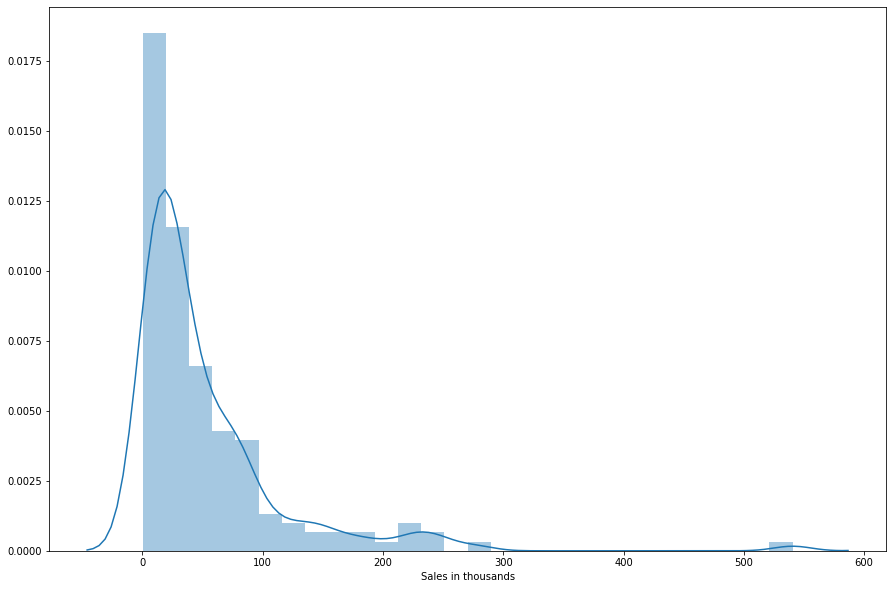

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Sales in thousands'])

### Linear Regression Training

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)
coeff_df = pd.DataFrame(reg.coef_, index = ['Manufacturer','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency'], columns=['Coefficient'])
coeff_df

,Coefficient
Manufacturer,-40.084933
4-year resale value,-21.204849
Vehicle type,5.048894
Price in thousands,-132.674533
Engine size,224.367570
Horsepower,-204.920485
Width,-9.260897
Length,27.100794
Fuel capacity,95.066237
Fuel efficiency,63.165700


### Prediction

In [12]:
y_pred = reg.predict(X_test)

### Actual vs Predicted y vaues

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1.866,-114.564546
1,181.749,79.123506
2,49.989,49.342996
3,63.849,34.541076
4,14.69,31.340809
...,...,...
58,13.462,44.069545
59,12.855,54.154455
60,42.643,57.325343
61,15.467,-1.412524


### Evaluating the performance of the algorithm

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.38122447463495
Mean Squared Error: 5643.433979146951
Root Mean Squared Error: 75.12279267404102


### Model Experimentation

#### Experimenting by not normalizing the features

In [21]:
data = pd.read_csv("Car_sales.csv")
data = data.drop(['Latest Launch','Wheelbase','Curb weight','Model'], axis=1)
le = LabelEncoder() 
data['Vehicle type']= le.fit_transform(data['Vehicle type'])  # 1 - Passenger / 0 - Car
data['Manufacturer']= le.fit_transform(data['Manufacturer']) 
data = data.replace('.', np.NaN) #Replacing all dot values with NaN
X = data.iloc[:, :].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])
data = pd.DataFrame(data=X, index=list(range(157)), columns=['Manufacturer','Sales in thousands','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency'])
X = data[['Manufacturer','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency']].values # Features
y = data['Sales in thousands'].values # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=40)


In [22]:
data.head()

,Manufacturer,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Width,Length,Fuel capacity,Fuel efficiency
0,0,16.919,16.36,1,21.5,1.8,140,67.3,172.4,13.2,28
1,0,39.384,19.875,1,28.4,3.2,225,70.3,192.9,17.2,25
2,0,14.114,18.225,1,27.3908,3.2,225,70.6,192,17.2,26
3,0,8.588,29.725,1,42,3.5,210,71.4,196.6,18,22
4,1,20.397,22.255,1,23.99,1.8,150,68.2,178,16.4,27


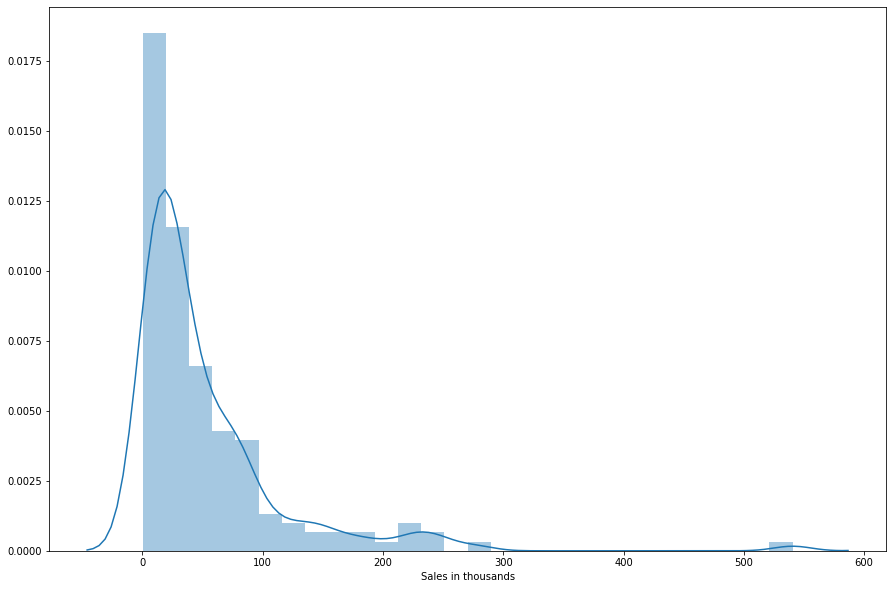

In [17]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Sales in thousands'])

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)
coeff_df = pd.DataFrame(reg.coef_, index = ['Manufacturer','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency'], columns=['Coefficient'])
coeff_df

,Coefficient
Manufacturer,-1.054528
4-year resale value,0.634968
Vehicle type,-48.679040
Price in thousands,-0.398204
Engine size,26.585286
Horsepower,-0.719482
Width,0.786766
Length,1.660094
Fuel capacity,-1.108715
Fuel efficiency,5.293304


In [19]:
y_pred = reg.predict(X_test)

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,88.028,-114.564546
1,1.526,79.123506
2,35.945,49.342996
3,18.78,34.541076
4,51.102,31.340809
...,...,...
58,23.713,44.069545
59,71.186,54.154455
60,80.62,57.325343
61,92.364,-1.412524


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50.88683804672149
Mean Squared Error: 4248.953650056162
Root Mean Squared Error: 65.1839984202884


#### Reducing the features

In [38]:
data = pd.read_csv("Car_sales.csv")
data = data.drop(['Latest Launch','Wheelbase','Curb weight','Model'], axis=1)
le = LabelEncoder() 
data['Vehicle type']= le.fit_transform(data['Vehicle type'])  # 1 - Passenger / 0 - Car
data['Manufacturer']= le.fit_transform(data['Manufacturer']) 
data = data.replace('.', np.NaN) #Replacing all dot values with NaN
X = data.iloc[:, :].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])
data = pd.DataFrame(data=X, index=list(range(157)), columns=['Manufacturer','Sales in thousands','4-year resale value','Vehicle type','Price in thousands','Engine size','Horsepower','Width','Length','Fuel capacity','Fuel efficiency'])
X = data[['Manufacturer','Price in thousands','Horsepower','Fuel efficiency']].values # Features
y = data['Sales in thousands'].values # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=40)


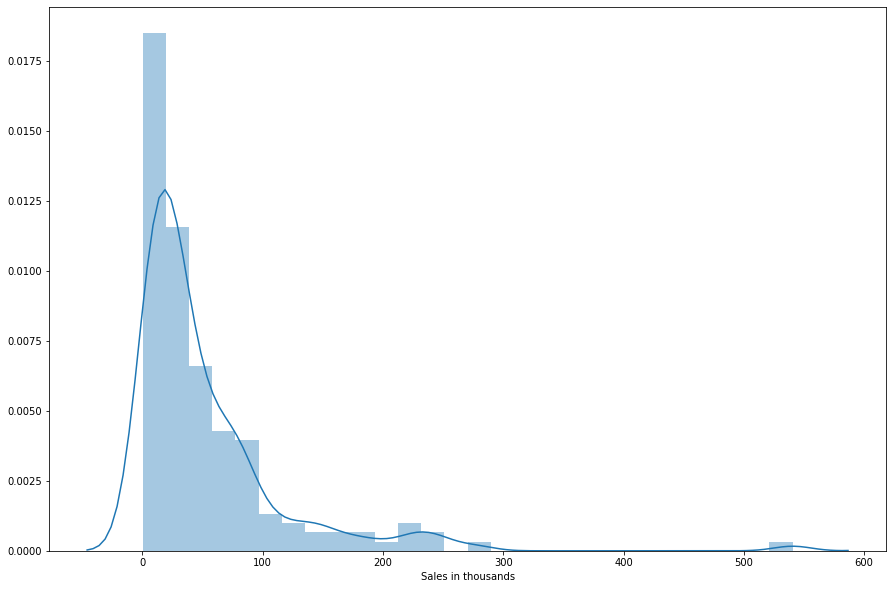

In [39]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Sales in thousands'])

In [40]:
reg = LinearRegression()
reg.fit(X_train, y_train)
coeff_df = pd.DataFrame(reg.coef_, index = ['Manufacturer','Price in thousands','Horsepower','Fuel efficiency'], columns=['Coefficient'])
coeff_df

,Coefficient
Manufacturer,-2.222139
Price in thousands,-1.234983
Horsepower,-0.258522
Fuel efficiency,-2.817040


In [41]:
y_pred = reg.predict(X_test)

In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,88.028,76.695631
1,1.526,29.360106
2,35.945,40.605232
3,18.78,81.606193
4,51.102,36.195358
...,...,...
58,23.713,49.492490
59,71.186,87.855940
60,80.62,51.871469
61,92.364,42.954524


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 35.62785035227098
Mean Squared Error: 1885.0670233889768
Root Mean Squared Error: 43.41735854919063


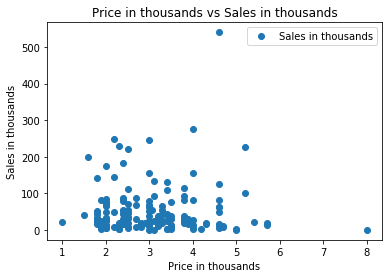

In [47]:
data.plot(x='Engine size', y='Sales in thousands', style='o')  
plt.title('Price in thousands vs Sales in thousands')  
plt.xlabel('Price in thousands')  
plt.ylabel('Sales in thousands')  
plt.show()